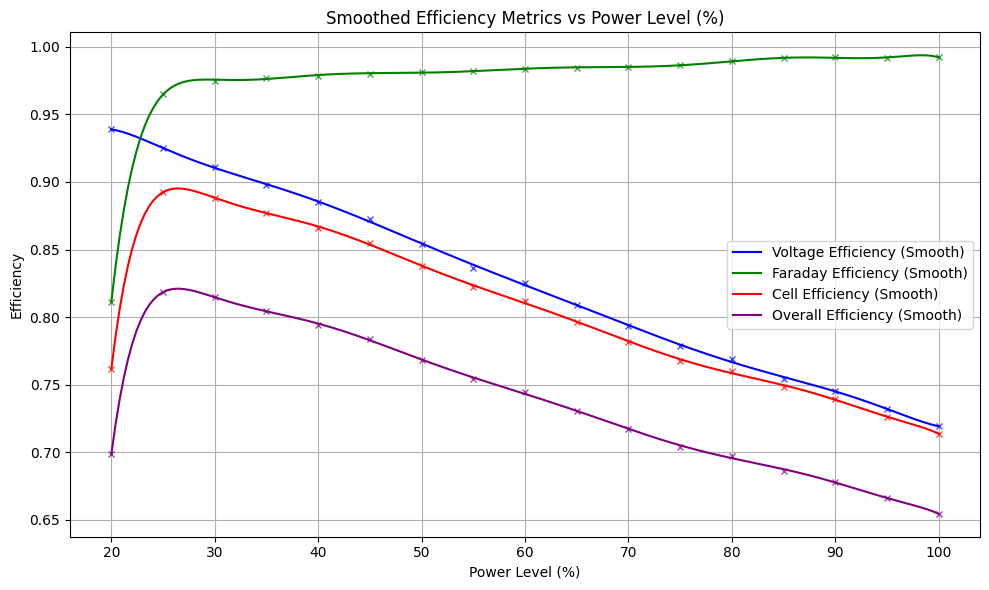

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Load the Excel file
file_path = 'C:\\Users\\User\\Desktop\\Internship\\Real Results\\Book1.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Rename columns for easier access (adjust based on your file's structure)
df.columns = [
    'Power_Level', 'Voltage', 'Current', 'Surface_Area', 'Hydrogen_Volume_Flow',
    'Valve_Output', 'Temperature', 'Pressure', 'Voltage_Cell', 'Current_Density', 
    'Current_Cell', 'Real_Hydrogen_Volume_Flow_m3', 'Real_Hydrogen_Volume_Flow_kg', 
    'Mass_Flow_kg_s', 'Hydrogen_Mol_Flow', 'Voltage_Efficiency', 'Faraday_Efficiency', 
    'Cell_Efficiency', 'Power', 'Overall_Efficiency'
]


# Drop the first row if it contains units (adjust as needed)
df = df.drop(0)

# Convert relevant columns to numeric values (ignore errors for non-numeric cells)
df['Power_Level'] = pd.to_numeric(df['Power_Level'], errors='coerce')
df['Voltage_Efficiency'] = pd.to_numeric(df['Voltage_Efficiency'], errors='coerce')
df['Faraday_Efficiency'] = pd.to_numeric(df['Faraday_Efficiency'], errors='coerce')
df['Cell_Efficiency'] = pd.to_numeric(df['Cell_Efficiency'], errors='coerce')
df['Overall_Efficiency'] = pd.to_numeric(df['Overall_Efficiency'], errors='coerce')

# Drop any rows with missing values to ensure smooth processing
df = df.dropna(subset=['Power_Level', 'Voltage_Efficiency', 'Faraday_Efficiency', 'Cell_Efficiency', 'Overall_Efficiency'])

# Define the Power Level data and efficiency metrics
power_level = df['Power_Level']
voltage_efficiency = df['Voltage_Efficiency']
faraday_efficiency = df['Faraday_Efficiency']
cell_efficiency = df['Cell_Efficiency']
overall_efficiency = df['Overall_Efficiency']

# Polynomial Regression for Smoothing
degree = 10  # Polynomial degree for regression smoothing

# Fit polynomial regressions
poly_voltage_efficiency = Polynomial.fit(power_level, voltage_efficiency, degree)
poly_faraday_efficiency = Polynomial.fit(power_level, faraday_efficiency, degree)
poly_cell_efficiency = Polynomial.fit(power_level, cell_efficiency, degree)
poly_overall_efficiency = Polynomial.fit(power_level, overall_efficiency, degree)

# Generate smooth x-axis values
power_smooth = np.linspace(power_level.min(), power_level.max(), 200)

# Define colors for each efficiency type
color_voltage = 'blue'
color_faraday = 'green'
color_cell = 'red'
color_overall = 'purple'

# Plotting
plt.figure(figsize=(10, 6))

# Plot the data points (scatter with 'x' markers) using defined colors
plt.plot(power_level, voltage_efficiency, 'x', markersize=4, alpha=0.7, color=color_voltage)
plt.plot(power_level, faraday_efficiency, 'x', markersize=4, alpha=0.7, color=color_faraday)
plt.plot(power_level, cell_efficiency, 'x',  markersize=4, alpha=0.7, color=color_cell)
plt.plot(power_level, overall_efficiency, 'x',  markersize=4, alpha=0.7, color=color_overall)

# Compute polynomial smoothed values
smooth_voltage_eff = poly_voltage_efficiency(power_smooth)
smooth_faraday_eff = poly_faraday_efficiency(power_smooth)
smooth_cell_eff = poly_cell_efficiency(power_smooth)
smooth_overall_eff = poly_overall_efficiency(power_smooth)

# Plot the smoothed polynomial regression lines using the same colors
plt.plot(power_smooth, smooth_voltage_eff, '-', label='Voltage Efficiency (Smooth)', color=color_voltage)
plt.plot(power_smooth, smooth_faraday_eff, '-', label='Faraday Efficiency (Smooth)', color=color_faraday)
plt.plot(power_smooth, smooth_cell_eff, '-', label='Cell Efficiency (Smooth)', color=color_cell)
plt.plot(power_smooth, smooth_overall_eff, '-', label='Overall Efficiency (Smooth)', color=color_overall)

# Customize plot
plt.title('Smoothed Efficiency Metrics vs Power Level (%)')
plt.xlabel('Power Level (%)')
plt.ylabel('Efficiency')
plt.legend()
plt.grid()
plt.tight_layout()

# Save the plot if needed
plt.savefig('smoothed_efficiency_vs_power_level.png', dpi=300)

# Display the plot
plt.show()